In [4]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *


from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import train_test_split

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Decision Trees

## 1. Explore

In [5]:
gpa = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/CCfraud.csv")
gpa.head()

,fraud,home,amount,cashBack
0,0,1,81.217853,0
1,0,1,67.879223,0
2,0,1,75.989902,0
3,0,1,67.462833,0
4,0,0,62.610021,0


## 2. Build Model

In [12]:
X = gpa[["home","amount","cashBack"]]
y = gpa["fraud"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

zscore = StandardScaler()
zscore.fit(X_train[["amount"]])

X_train["amount"] = zscore.transform(X_train[["amount"]])
X_test["amount"] = zscore.transform(X_test[["amount"]])

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

## 3. Evaluate Model

In [13]:
y_pred = tree.predict(X_test)

accuracy_score(y_test, y_pred)

0.875

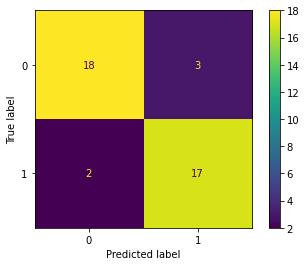

In [14]:
plot_confusion_matrix(tree, X_test, y_test)

## Looking more into our tree and playing around

In [15]:
tree.get_depth()

9

In [16]:
tree.get_n_leaves()

34

In [17]:
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [18]:
y_pred = tree.predict(X_test)

accuracy_score(y_test,y_pred)

0.925

In [19]:
tree.get_depth()

5

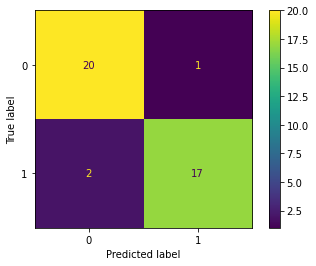

In [20]:
plot_confusion_matrix(tree, X_test, y_test)

In [24]:
tree.feature_importances_

array([0.08048466, 0.81089607, 0.10861926])

# Another Example

In [25]:
heart = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


0.5740350877192983
[19, 13, 14, 13]


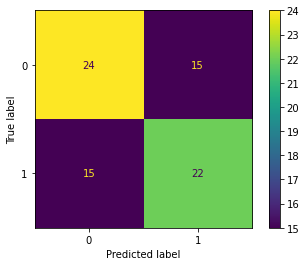

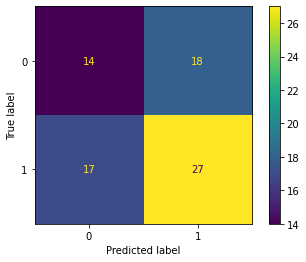

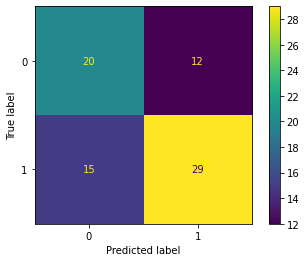

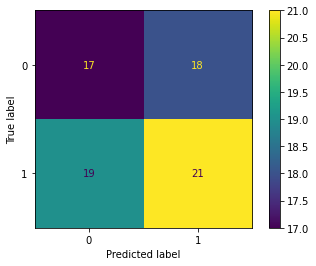

In [29]:
predictors = ["sex", "age", "restecg", "chol"]

X = heart[predictors]
y = heart["target"]

kf = KFold(4, shuffle = True)

acc = []
depth = []

for train, test in kf.split(X):
    X_train = X.iloc[train,]
    X_test = X.iloc[test,]
    y_train = y[train]
    y_test = y[test]
    
    z = StandardScaler()
    X_train[["age", "chol"]] = z.fit_transform(X_train[["age", "chol"]])
    X_test[["age", "chol"]] = z.transform(X_test[["age", "chol"]])
    
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    
    acc.append(accuracy_score(y_test, tree.predict(X_test)))
    depth.append(tree.get_depth())
    
    plot_confusion_matrix(tree, X_test, y_test)

print(np.mean(acc))
print(depth)